In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import PIL

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/kaggle/input/face-mask-detection/annotations/maksssksksss737.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss410.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss537.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss295.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss771.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss234.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss620.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss70.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss281.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss393.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss296.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss756.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss260.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss57.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss224.xml
/kaggle/inpu

In [2]:
# Path
img_dir = '/kaggle/input/face-mask-detection/images'
"""
annotation_directory contains files, and each file is associated to only one image,
and it contains the height and width of the image and also xmin,ymin,xmax, and ymax of each boundary box
inside the image
"""
annotation_dir = '/kaggle/input/face-mask-detection/annotations'

input_dir = '/kaggle/input/face-mask-detection'
output_dir = '/kaggle/working/'

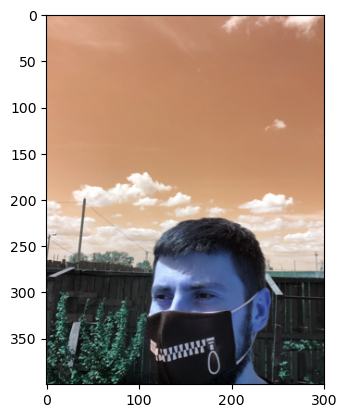

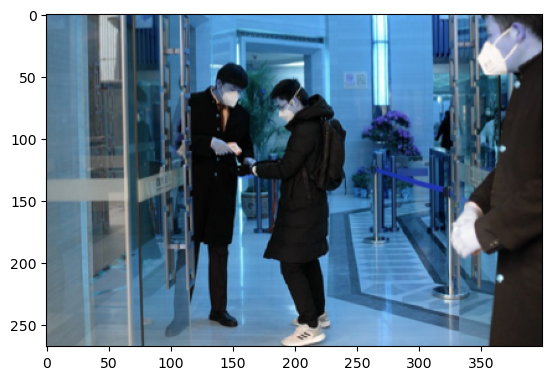

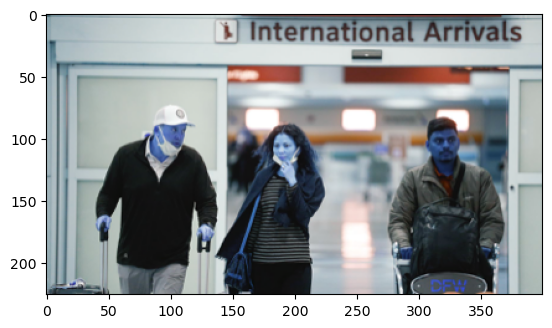

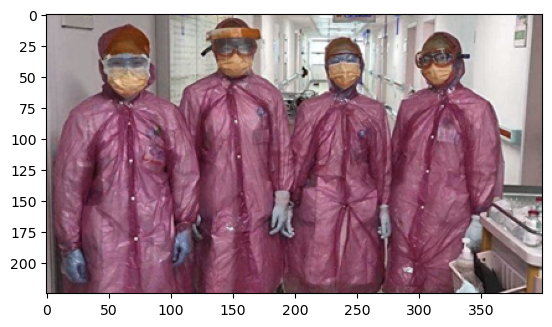

In [3]:
# sample visuaization
for idx, image in enumerate(os.listdir(img_dir)):
    img = cv2.imread(os.path.join(img_dir, image), 1)
    plt.imshow(img)
    plt.show()
    
    if idx == 3:
        break

In [4]:
img_file_path = []
for img in os.listdir(img_dir): # img here is the name of the image not the image itself
    image = cv2.imread(os.path.join(img_dir,img), 0) # 0 for grayscale
    img_file_path.append(f'{img}')

libpng warning: iCCP: Not recognizing known sRGB profile that has been edited


In [5]:
import xml.etree.ElementTree as ET 
"""
ElementTree module provides 
a way to work with Extensible Markup Language (XML) documents as a tree-like structure of elements.
"""
import glob

In [6]:
df = { 'name': [],
        'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}
"""
The glob.glob() function returns a list of all the pathnames that match the specified pattern.
The resulting list can then be used to process or analyze the files that match the pattern.
"""
for idx, anno in enumerate(glob.glob(annotation_dir + '/*.xml')):
    trees = ET.parse(anno)
    
    #print(anno) print/view the annotation to understand the following code
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width = int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))
                    
        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]] 
                    df['name'] += [anno.split('/')[-1][0:-4]]
                    
                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]
                            
                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]
                    
    

In [7]:
df1 = pd.DataFrame(df)
df1.head()

name                  label  width  height  xmin  ymin  xmax  \
0  maksssksksss737              with_mask    400     226    28    55    46   
1  maksssksksss737              with_mask    400     226    98    62   111   
2  maksssksksss737  mask_weared_incorrect    400     226   159    50   193   
3  maksssksksss737              with_mask    400     226   293    59   313   
4  maksssksksss737              with_mask    400     226   352    51   372   

   ymax  
0    71  
1    78  
2    90  
3    80  
4    72

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4072 non-null   object
 1   label   4072 non-null   object
 2   width   4072 non-null   int64 
 3   height  4072 non-null   int64 
 4   xmin    4072 non-null   int64 
 5   ymin    4072 non-null   int64 
 6   xmax    4072 non-null   int64 
 7   ymax    4072 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 254.6+ KB


In [9]:
label_map = { 'without_mask': 0,
            'with_mask': 1,
            'mask_weared_incorrect': 2}

df1['class'] = df1['label'].map(label_map)

In [10]:
df1.head()

name                  label  width  height  xmin  ymin  xmax  \
0  maksssksksss737              with_mask    400     226    28    55    46   
1  maksssksksss737              with_mask    400     226    98    62   111   
2  maksssksksss737  mask_weared_incorrect    400     226   159    50   193   
3  maksssksksss737              with_mask    400     226   293    59   313   
4  maksssksksss737              with_mask    400     226   352    51   372   

   ymax  class  
0    71      1  
1    78      1  
2    90      2  
3    80      1  
4    72      1

In [11]:
# split train, test, val data
from sklearn.model_selection import train_test_split

train, test = train_test_split(img_file_path, test_size=0.2, random_state=101)
train, val = train_test_split(train, test_size=0.15, random_state=101)

In [12]:
# yolo v5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 15814 (delta 9), reused 22 (delta 2), pack-reused 15769
Receiving objects: 100% (15814/15814), 14.59 MiB | 22.00 MiB/s, done.
Resolving deltas: 100% (10823/10823), done.
/kaggle/working/yolov5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-api 1.18.0 requires importlib-metadata~=6.0.0, but you have importlib-metadata 6.7.0 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.


In [13]:
# create a separate folder structure for train, validation and test image and validation files
os.chdir('/kaggle/working')
"""
The os.chdir() function is used to change the working directory
of the Python script to the specified path.
"""
os.mkdir('./yolov5/data/train')
os.mkdir('./yolov5/data/val')
os.mkdir('./yolov5/data/test')
os.mkdir('./yolov5/data/train/images')
os.mkdir('./yolov5/data/train/labels')
os.mkdir('./yolov5/data/val/images')
os.mkdir('./yolov5/data/val/labels')
os.mkdir('./yolov5/data/test/images')
os.mkdir('./yolov5/data/test/labels')

In [14]:
# copy the image data in the yolov5 folder 
def open_image_file(image_items, folder_name):
    
    for image in image_items:
        img = PIL.Image.open(f'{img_dir}/{image}')
        img1 = img.resize((640, 480))
        _ = img1.save(f'{output_dir}/yolov5/data/{folder_name}/images/{image}')

open_image_file(train, 'train')
open_image_file(val, 'val')
open_image_file(test, 'test')

In [15]:
df1['xmin'] = (640/df1['width']) * df1['xmin']
df1['ymin'] = (480/df1['height']) * df1['ymin']
df1['xmax'] = (640/df1['width']) * df1['xmax']
df1['ymax'] = (480/df1['height']) * df1['ymax']
df1.head()

name                  label  width  height   xmin        ymin  \
0  maksssksksss737              with_mask    400     226   44.8  116.814159   
1  maksssksksss737              with_mask    400     226  156.8  131.681416   
2  maksssksksss737  mask_weared_incorrect    400     226  254.4  106.194690   
3  maksssksksss737              with_mask    400     226  468.8  125.309735   
4  maksssksksss737              with_mask    400     226  563.2  108.318584   

    xmax        ymax  class  
0   73.6  150.796460      1  
1  177.6  165.663717      1  
2  308.8  191.150442      2  
3  500.8  169.911504      1  
4  595.2  152.920354      1

In [16]:
df1[['xmin', 'ymin', 'xmax', 'ymax']] = df1[['xmin', 'ymin', 'xmax', 'ymax']].astype('int')

In [17]:
WIDTH = 640
HEIGHT = 480

In [18]:
df1['x_center'] = (df1['xmin']+df1['xmax'])/(2*WIDTH)
df1['y_center'] = (df1['ymin']+df1['ymax'])/(2*HEIGHT)
df1['box_width'] = (df1['xmax']-df1['xmin'])/ WIDTH
df1['box_height'] = (df1['ymax']-df1['ymin'])/ HEIGHT

In [19]:
df1.head()

name                  label  width  height  xmin  ymin  xmax  \
0  maksssksksss737              with_mask    400     226    44   116    73   
1  maksssksksss737              with_mask    400     226   156   131   177   
2  maksssksksss737  mask_weared_incorrect    400     226   254   106   308   
3  maksssksksss737              with_mask    400     226   468   125   500   
4  maksssksksss737              with_mask    400     226   563   108   595   

   ymax  class  x_center  y_center  box_width  box_height  
0   150      1  0.091406  0.277083   0.045312    0.070833  
1   165      1  0.260156  0.308333   0.032813    0.070833  
2   191      2  0.439063  0.309375   0.084375    0.177083  
3   169      1  0.756250  0.306250   0.050000    0.091667  
4   152      1  0.904687  0.270833   0.050000    0.091667

In [20]:
df1 = df1.astype(str)

In [21]:
img_file_path[:5]

['maksssksksss810.png',
 'maksssksksss848.png',
 'maksssksksss145.png',
 'maksssksksss825.png',
 'maksssksksss30.png']

In [22]:
def copy_label(label_items, folder_name):
    file_name = [x.split('.')[0] for x in img_file_path]
    for name in file_name:
        data = df1[df1.name == name]
        box_list = []
        for idx in range(len(data)):
            row = data.iloc[idx]
            box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

        text = "\n".join(box_list)
        with open(f'{output_dir}/yolov5/data/{folder_name}/labels/{name}.txt', 'w') as file:
            file.write(text)

In [23]:
copy_label(train, 'train')
copy_label(val, 'val')
copy_label(test, 'test')

In [24]:
os.chdir('/kaggle/working/yolov5/data/train/labels')

In [25]:
cat maksssksksss0.txt 

0 0.1828125 0.33645833333333336 0.059375 0.10208333333333333
1 0.40078125 0.33229166666666665 0.0796875 0.11875
0 0.66875 0.3145833333333333 0.06875 0.1375

In [26]:
# Configure .yaml file 
yaml_file = """train: /kaggle/working/yolov5/data/train/images
val: /kaggle/working/yolov5/data/val/images
                
nc: 3
names: [without_mask, with_mask, mask_weared_incorrect]"""

with open('/kaggle/working/yolov5/data/data.yaml', 'w') as f:
    f.write(yaml_file)

In [27]:
%cat /kaggle/working/yolov5/data/data.yaml

train: /kaggle/working/yolov5/data/train/images
val: /kaggle/working/yolov5/data/val/images
                
nc: 3
names: [without_mask, with_mask, mask_weared_incorrect]

In [28]:
!python /kaggle/working/yolov5/train.py --img 640 --epochs 100 --batch 32 --data /kaggle/working/yolov5/data/data.yaml  --weights yolov5s.pt  --cache
                                        # image size

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W

In [29]:
from IPython.display import Image as Display

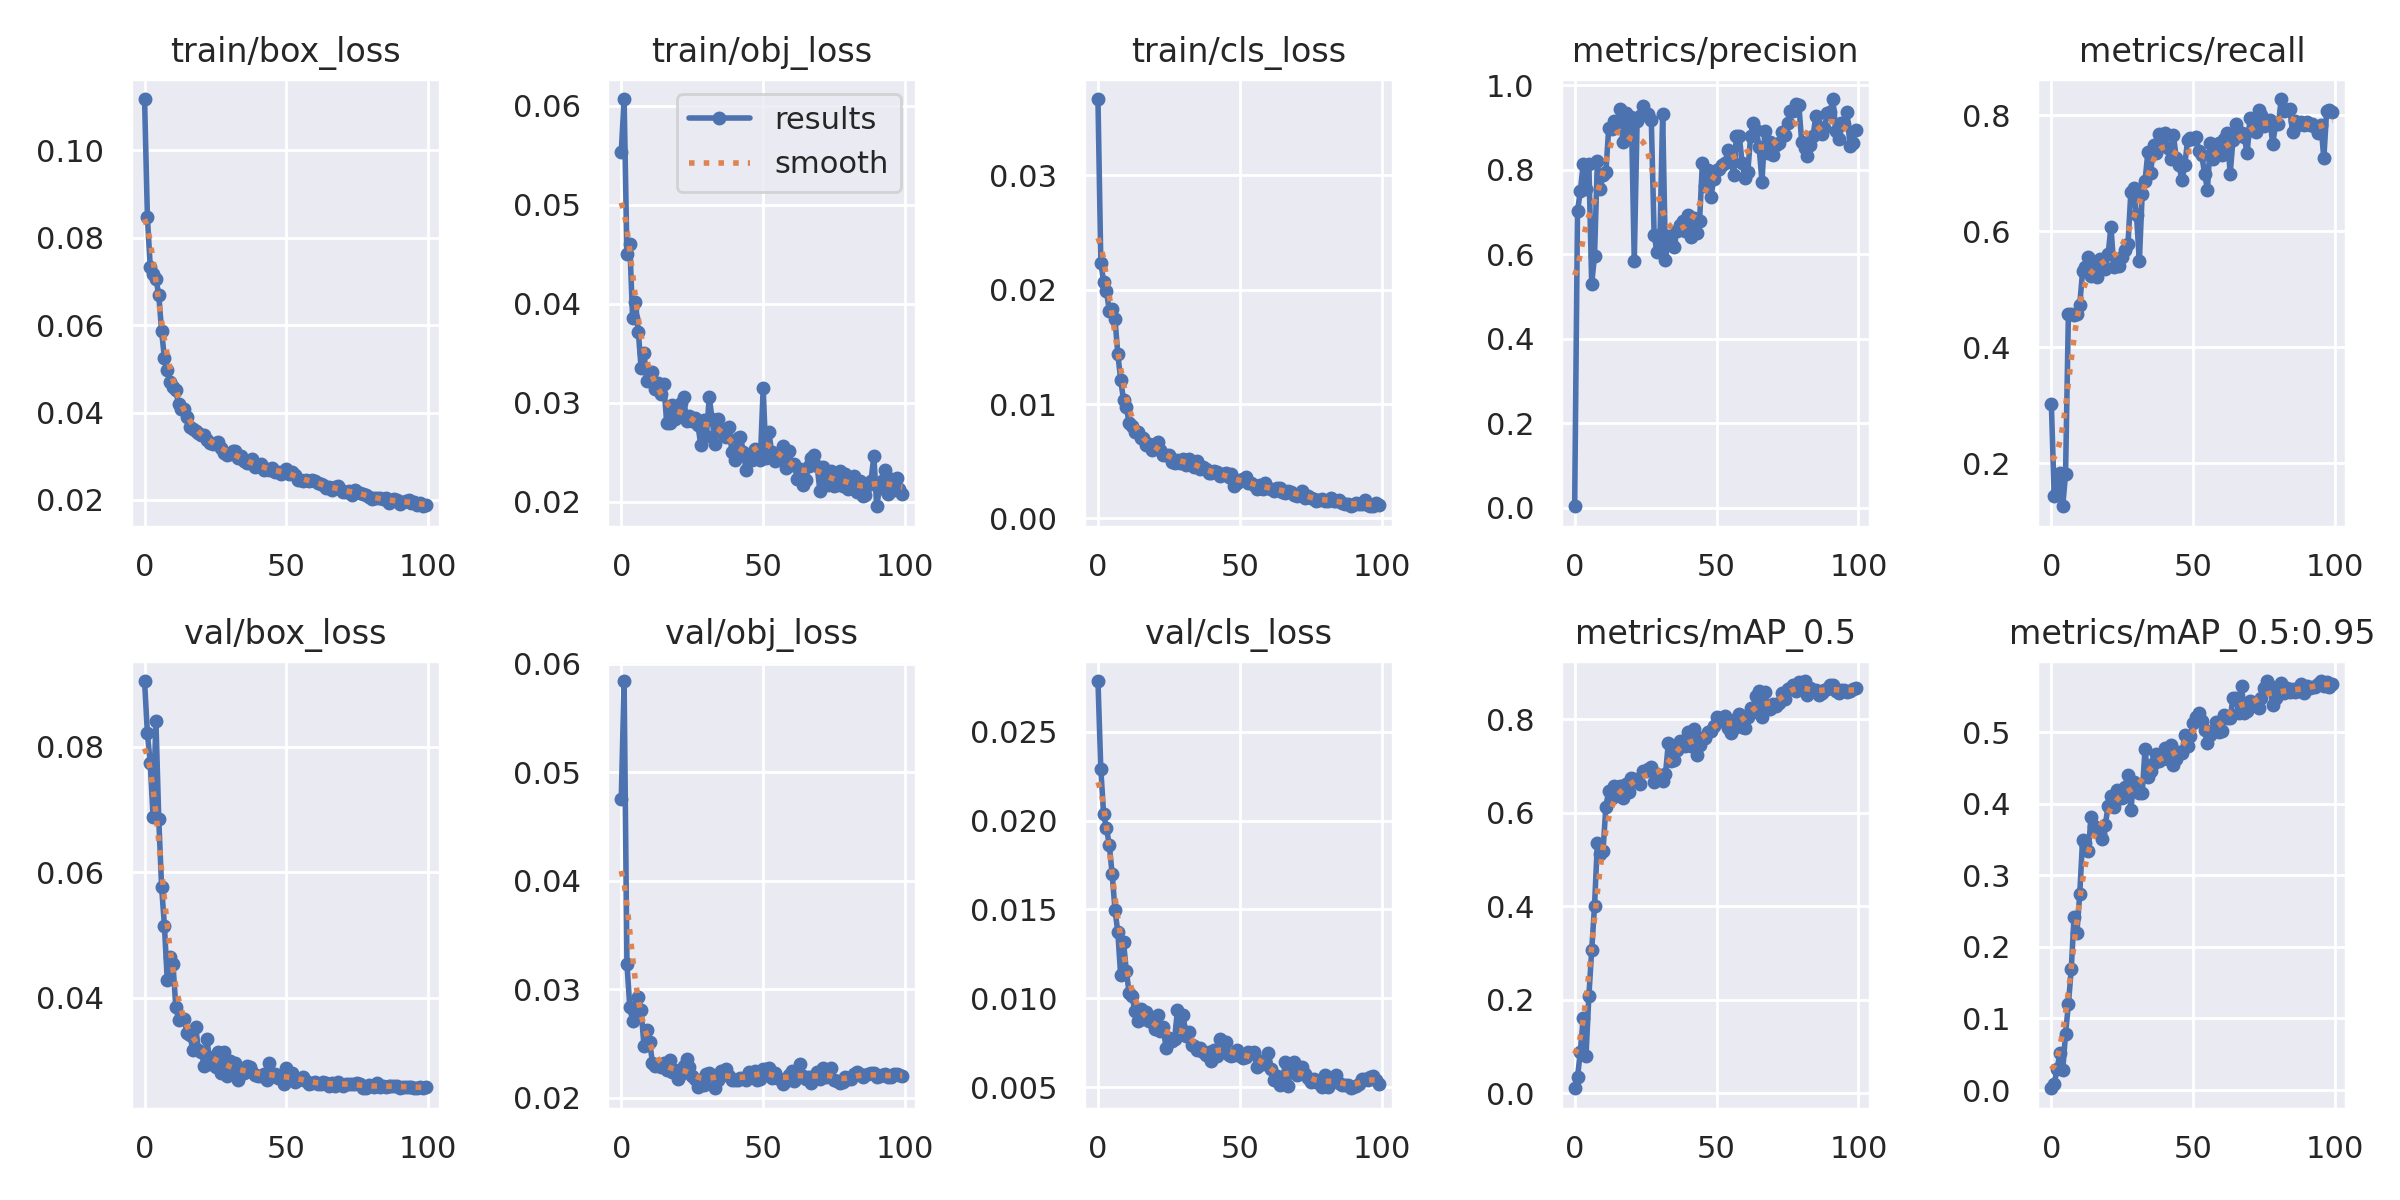

In [30]:
Display(filename='/kaggle/working/yolov5/runs/train/exp/results.png', width=1080)

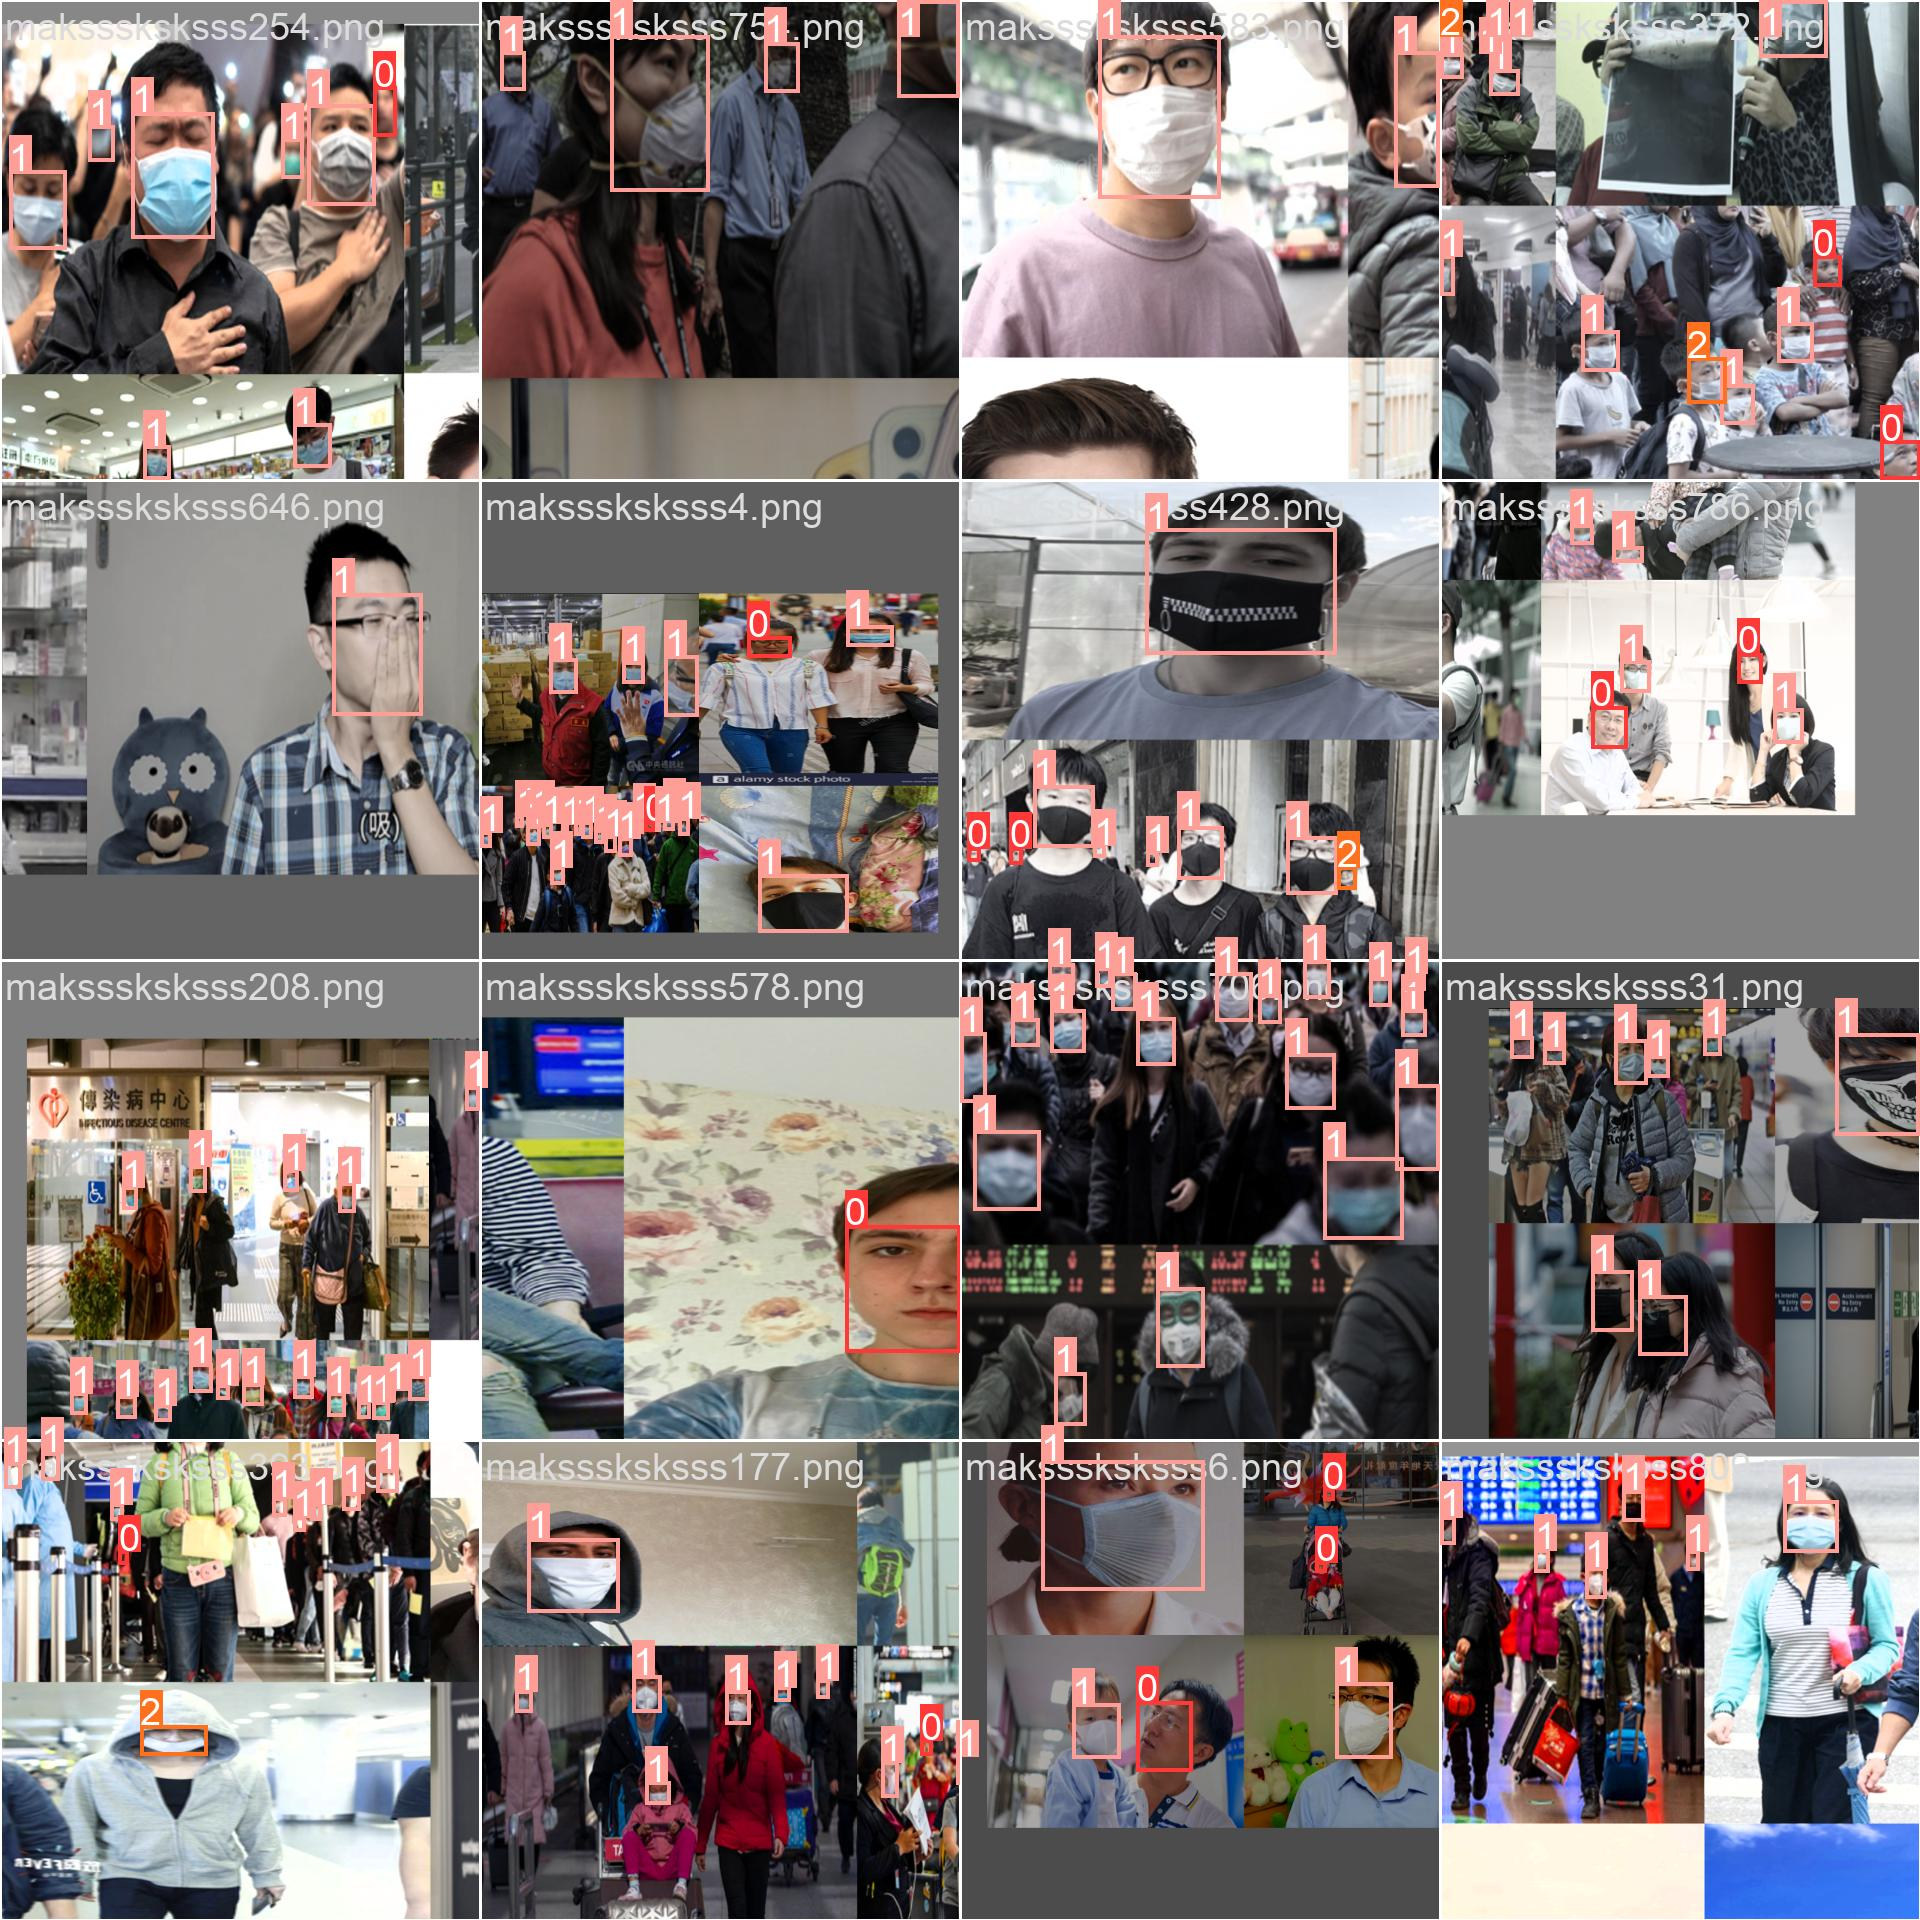

In [32]:
Display(filename='/kaggle/working/yolov5/runs/train/exp/train_batch0.jpg', width=600)

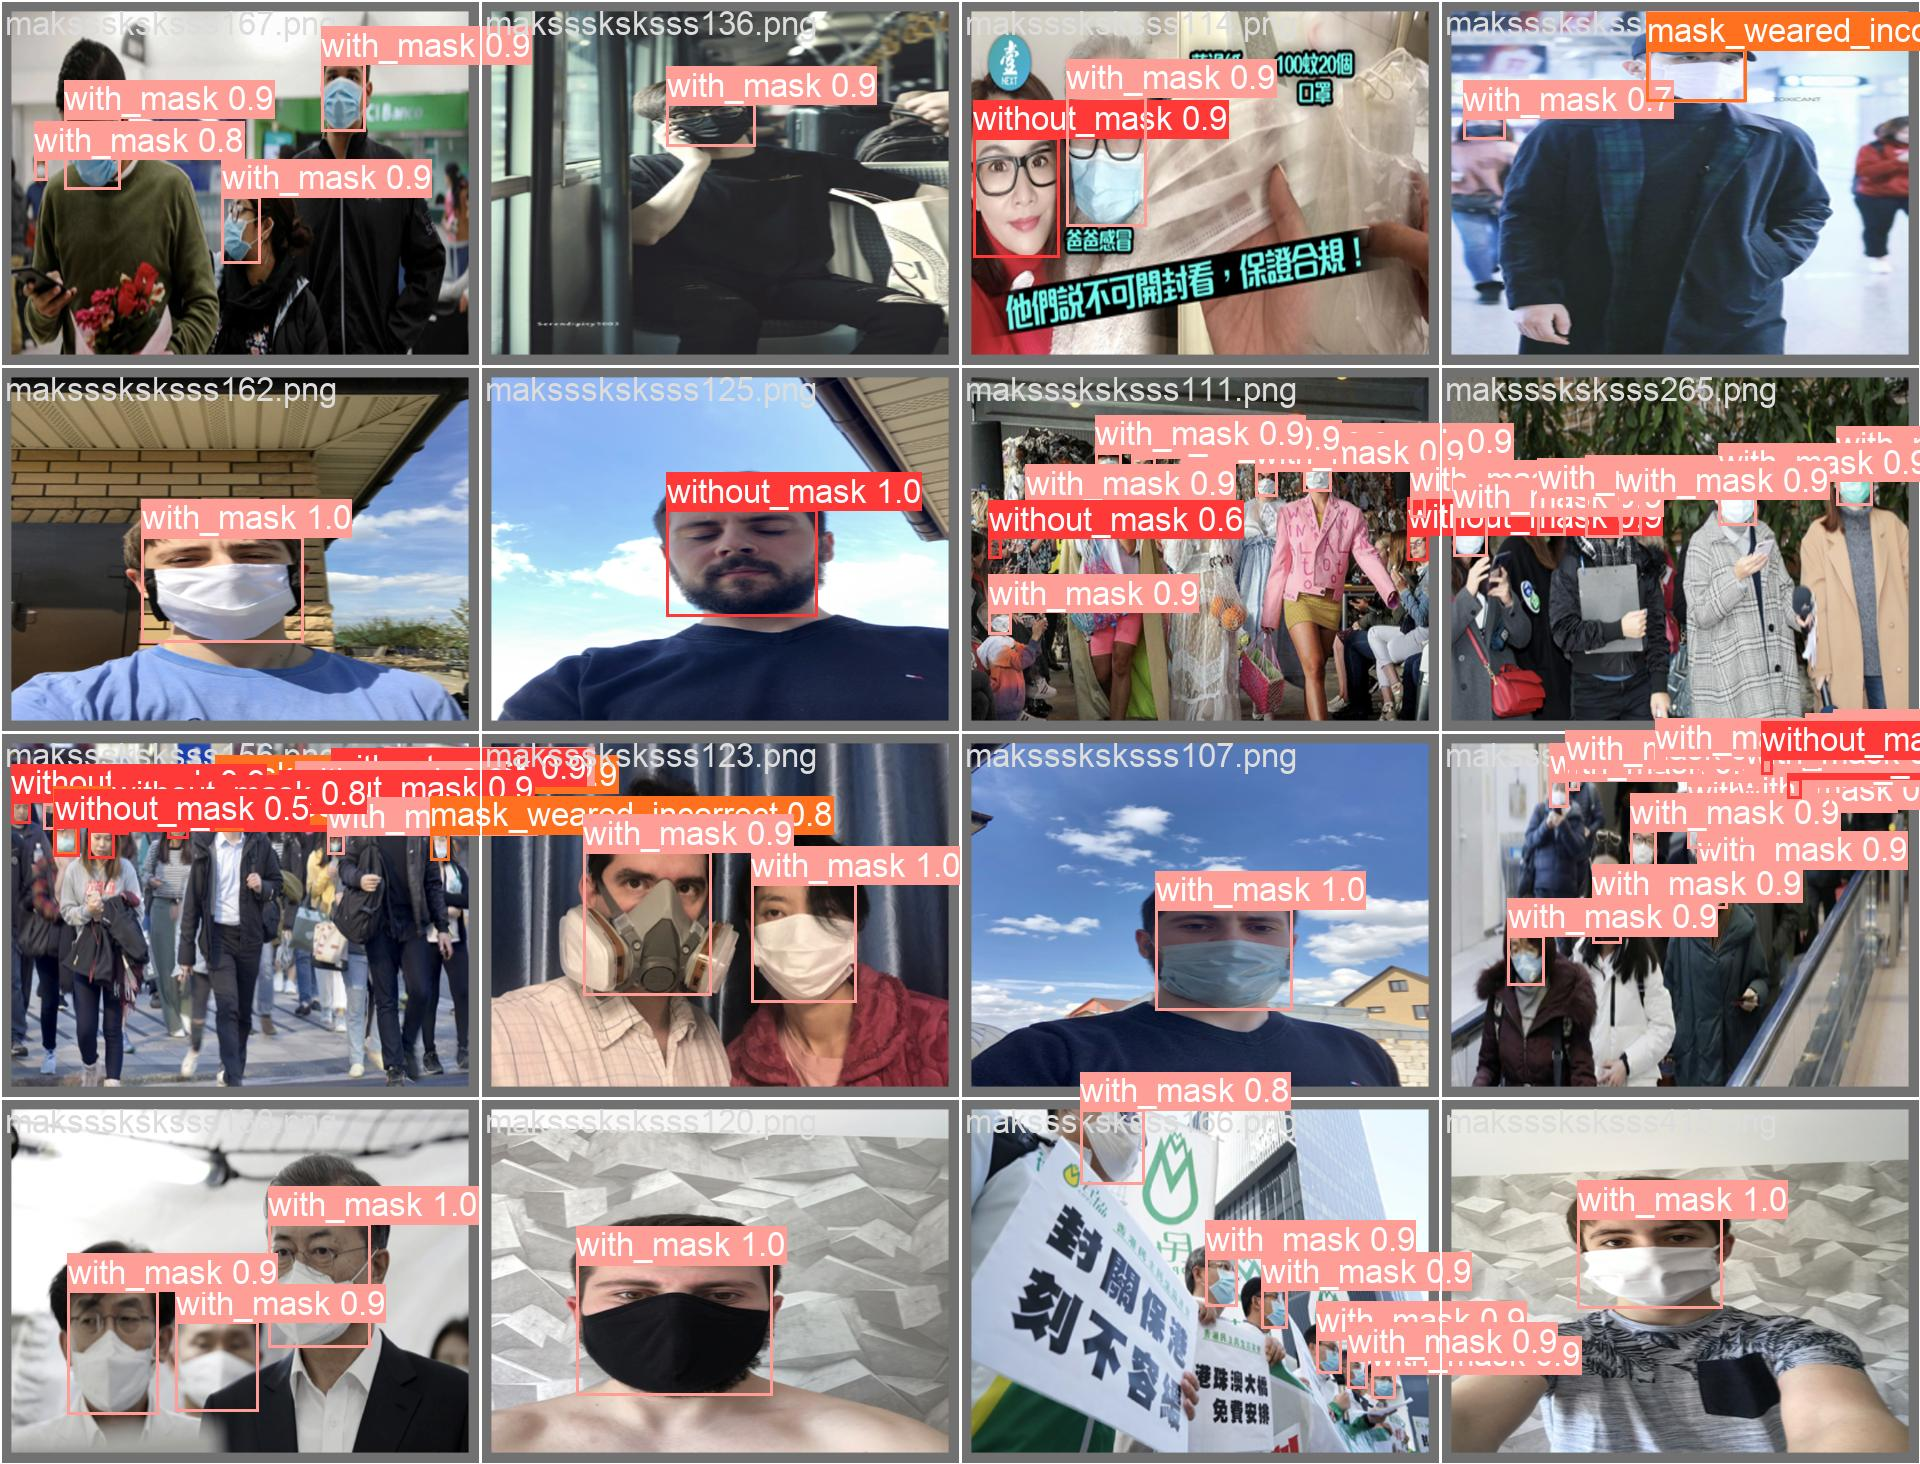

In [33]:
from PIL import Image, ImageOps
Image.open("/kaggle/working/yolov5/runs/train/exp/val_batch1_pred.jpg")